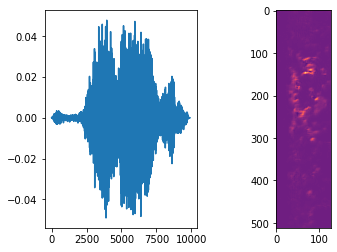

In [ ]:
'''  
MockingBot Demo.
'''
# Download the demo model:
# !wget 'https://storage.googleapis.com/drive-bulk-export-anonymous/20220915T235758Z/4133399871716478688/30bdb297-df52-457e-8988-92a53f4688ab/1/85a7f43c-748e-42f4-9eb2-50b4908486cc'
# !unzip 85a7f43c-748e-42f4-9eb2-50b4908486cc

from google.colab import files
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython


generator = tf.keras.models.load_model('Demo Model')

# Test the forward pass through the generator:
_batch_size, latent_dimensions = generator.input_shape

noise = tf.random.normal([1, latent_dimensions])

simulated_spectrograms = generator(noise, training=False)

figure, axes = plt.subplots(1, 2)

axes[1].imshow(simulated_spectrograms[0].numpy().T, cmap='magma')

FT_frame_length, FT_frame_step = 513, 74

reconstructed_signal = tf.signal.inverse_stft(
    stfts=tf.cast(simulated_spectrograms[0], tf.complex64),
    frame_length=FT_frame_length,
    frame_step=FT_frame_step,
    window_fn=tf.signal.inverse_stft_window_fn(FT_frame_step),
)

axes[0].plot(reconstructed_signal)

plt.show()

IPython.display.display(IPython.display.Audio(
    reconstructed_signal, rate=8_000))